# US Economic Data From 1917-2022

### Wrote SQL queries before importing to get money_printed_in_billions, prct_change_printed, CPI, and purch_power

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('US_Economy.csv')
df2 = pd.read_csv('US_Economy2.csv')
df.sort_values('CPI', ascending = False)
pd.options.display.max_rows = 200

# Raw Data

In [185]:
df.head()

,Year,Money_In_Circ,Money_Printed_billions,Prct_Chnge_Printed,CPI,Purch_Power
0,2021,2168.081083,220.671000,11.331512,267.203000,12.324401
1,2020,1947.410083,202.310917,11.593090,258.811167,13.290019
2,2019,1745.099167,83.635167,5.033824,255.657417,14.650022
3,2018,1661.464000,106.021333,6.816152,251.106833,15.113589
4,2017,1555.442667,97.917667,6.718078,245.119583,15.758831


In [40]:
df2.head(7)

,Year,SP_500I_Value,Prct_Chnge_SP500I,Real_GDP_Per_Capita_th,Real_GDP,Real_GDP_Change,Prct_Chnge_GDP,Tax_Rev_b,Tax_Rev_Diff,Prct_Chnge_Tax_Rev,Money_In_Circ_b,Money_Printed_billions,Prct_Chnge_Printed,CPI,EFFR,Mortgage_Rate,Purch_Power
0,2021,4475.497500,26.937670,58478.00,19427.28700,1042.59975,5.671022,NaN,NaN,NaN,2168.081083,220.671000,11.331512,267.203000,0.080000,2.957692,12.324401
1,2020,3525.744167,8.166980,55415.50,18384.68725,-647.98425,-3.404589,5335983.0,-475.0,-0.008901,1947.410083,202.310917,11.593090,258.811167,0.375833,3.111698,13.290019
2,2019,3259.538333,5.349167,57584.75,19032.67150,425.88500,2.288869,5336458.0,226494.0,4.432399,1745.099167,83.635167,5.033824,255.657417,2.158333,3.935769,14.650022
3,2018,3094.033333,8.462737,56590.25,18606.78650,527.70250,2.918856,5109964.0,-107669.0,-2.063560,1661.464000,106.021333,6.816152,251.106833,1.831667,4.544615,15.113589
4,2017,2852.623333,14.612821,55310.75,18079.08400,398.81025,2.255679,5217633.0,379951.0,7.853989,1555.442667,97.917667,6.718078,245.119583,1.001667,3.989808,15.758831
5,2016,2488.921667,1.319591,54466.00,17680.27375,289.97850,1.667473,4837682.0,64002.0,1.340727,1457.525000,86.001250,6.270489,240.007167,0.395000,3.654038,16.466762
6,2015,2456.505833,5.421743,53988.25,17390.29525,458.24350,2.706367,4773680.0,231096.0,5.087325,1371.523750,92.396333,7.223388,237.017000,0.132500,3.850577,17.281290


# Graph of Effective Federal Funds Rate (EFFR) and Mortgage Rate

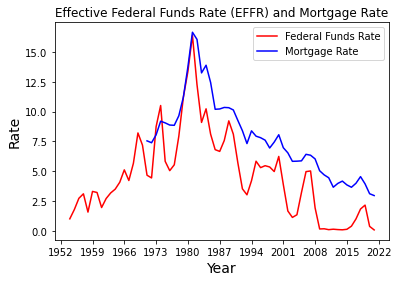

In [126]:
x = df2['Year']
mr = df2['Mortgage_Rate']
effr = df2['EFFR']

plt.title('Effective Federal Funds Rate (EFFR) and Mortgage Rate')
plt.xlabel('Year', size = 14)
plt.ylabel('Rate', size = 14)
plt.xticks(np.arange(min(x), 2023, 7))
plt.plot(x, effr, color = 'r')
plt.plot(x, mr, color = 'b')
plt.legend(['Federal Funds Rate','Mortgage Rate'])
plt.show()

# Graph of CPI and MIC per Year

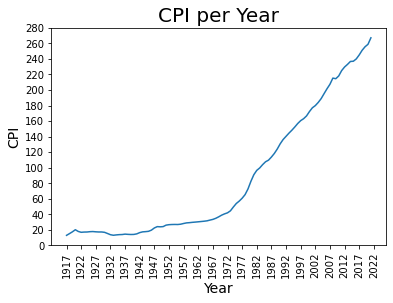

In [125]:
x = df['Year']
y = df['CPI']

plt.plot(x, y)
plt.xticks(np.arange(min(x), 2023, 5.0), rotation = 'vertical')
plt.yticks(np.arange(0, max(y)+20, 20))
plt.title('CPI per Year', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('CPI', size = 14)
plt.show()

# Graph of Purchasing Power per Year

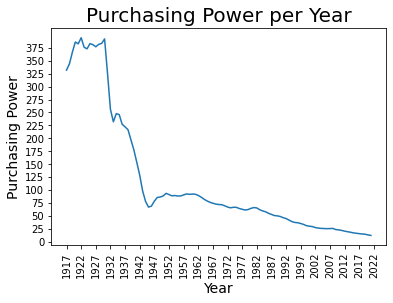

In [84]:
x = df['Year']
pp = df['Purch_Power']

plt.plot(df['Year'], df['Purch_Power'])
plt.xticks(np.arange(min(x), 2023, 5.0), rotation = 'vertical')
plt.yticks(np.arange(0, max(pp), 25))
plt.title('Purchasing Power per Year', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('Purchasing Power', size = 14)
plt.show()

# Graph of Currency Circulating Value per Year

/var/folders/2d/m83w00nd5gj01hnscst9zbsh0000gn/T/ipykernel_3227/3236116399.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7ff1b6271c40> has a label of '_line0' which cannot be automatically added to the legend.
  ax1.legend(lines, labels)
/var/folders/2d/m83w00nd5gj01hnscst9zbsh0000gn/T/ipykernel_3227/3236116399.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7ff1b6271fd0> has a label of '_line0' which cannot be automatically added to the legend.
  ax1.legend(lines, labels)


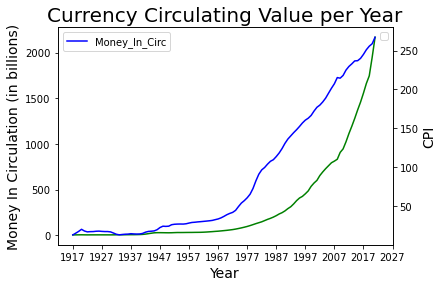

In [194]:
x = df['Year']
mic = df['Money_In_Circ']
cpi =df2['CPI']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(x, mic, color = 'g')

line2 = ax2.plot(x,cpi, color = 'b')

lines = line1+line2

labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.xticks(np.arange(min(x), max(x)+10, 10), rotation = 'vertical')
#ax1.yticks(np.arange(0, max(mic)+250, 250))
#ax2.yticks(np.arange(0, max(cpi), 5))
plt.title('Currency Circulating Value per Year', size = 20)
ax1.set_xlabel('Year', size = 14)
ax1.set_ylabel('Money In Circulation (in billions)', size = 14)
ax2.set_ylabel('CPI', size = 14)
plt.legend(['Money_In_Circ','CPI'])
plt.show()

# Graph Percent Change Printed

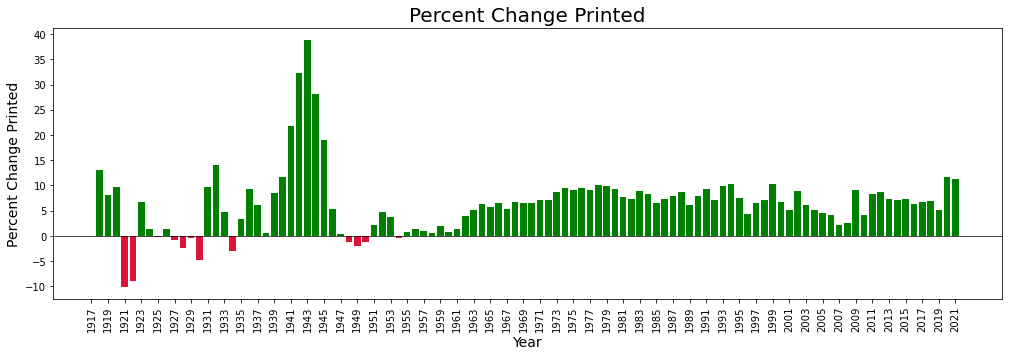

In [133]:
x = df2['Year']
pcp = df2['Prct_Chnge_Printed']

plt.figure(figsize = (17,5))
plt.bar(x,pcp,color=np.where(pcp < 0, 'crimson', 'g'))
plt.xticks(np.arange(min(x), max(x)+2, 2), rotation = 'vertical')
plt.yticks(np.arange(-10, max(pcp)+5, 5))
plt.title('Percent Change Printed', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('Percent Change Printed', size = 14)
plt.axhline(y=0, color='k', linestyle='-', lw = 0.7)
plt.show()